# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm

In [2]:
from sklearn.metrics import log_loss

In [3]:
SEED = 0

## Sigmoid Neuron

In [4]:
class SigmoidNeuron():
    """_summary_
    """
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_

        Returns
        -------
        _type_
            _description_
        """
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_

        Returns
        -------
        _type_
            _description_
        """
        return 1.0/(1.0 + np.exp(-(x)))
    
    def grad_w_mse(self, x, y):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_
        y : _type_
            _description_

        Returns
        -------
        _type_
            _description_
        """
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b_mse(self, x, y):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_
        y : _type_
            _description_

        Returns
        -------
        _type_
            _description_
        """
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_ce(self, x, y):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_
        y : _type_
            _description_

        Returns
        -------
        _type_
            _description_

        Raises
        ------
        ValueError
            _description_
        """
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")

    
    def fit(self,
            X,
            Y,
            epochs:int = 1,
            learning_rate: int = 1,
            initialize:bool = True,
            loss_fn = "mse",
            display_loss: bool = False):
        """_summary_

        Parameters
        ----------
        X : _type_
            _description_
        Y : _type_
            _description_
        epochs : int, optional
            _description_, by default 1
        learning_rate : int, optional
            _description_, by default 1
        initialize : bool, optional
            _description_, by default True
        loss_fn : str, optional
            _description_, by default "mse"
        display_loss : bool, optional
            _description_, by default False
        """
        
        # Initialize w, b
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
            loss = {}
        
        for i in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse": 
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)

            m = X.shape[1]
            self.w -= learning_rate * dw / m
            self.b -= learning_rate * db / m

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)



        # displaying loss
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            if loss_fn == "mse":
                plt.ylabel("Mean Squared Error")
            if loss_fn == "ce":
                plt.ylabel("Cross Entropy Error")
            plt.show()
    
    def predict(self, X):
        """_summary_

        Parameters
        ----------
        X : _type_
            _description_

        Returns
        -------
        _type_
            _description_
        """
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

### Custom color map

In [5]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "m", "green", "cyan"])

## Generate Data

In [6]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=SEED)

In [7]:
data.shape, labels.shape

((1000, 2), (1000,))

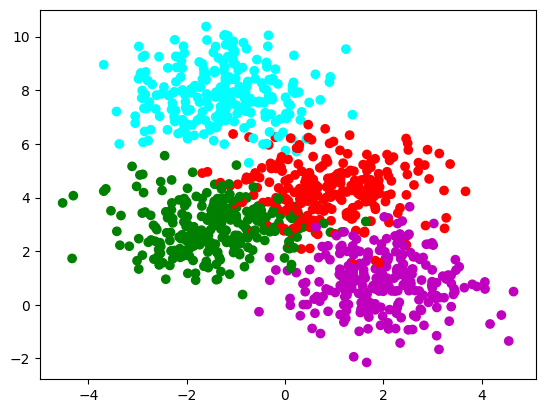

In [8]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap=my_cmap)
plt.show()

In [9]:
# creating data for binary classification
labels_original = labels
labels = np.mod(labels_original, 2)

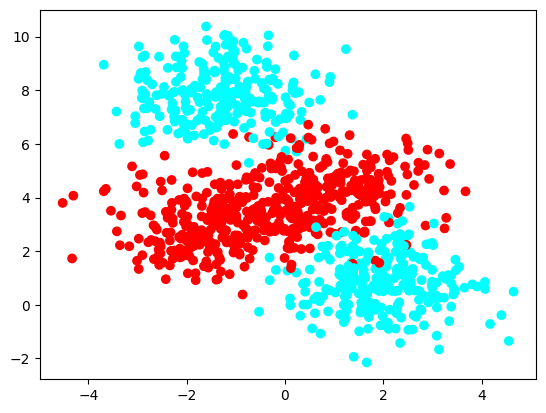

In [10]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap=my_cmap)
plt.show()

Generated data-points are non-linearly separable in manner

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=SEED)

`stratify=labels` is used to make sure the ratio of distribution of labels in train and test/validation is same.

In [12]:
X_train.shape, X_val.shape

((750, 2), (250, 2))

In [13]:
# Y_train, Y_val

## Sigmoid Neuron Classification

### Insta

  0%|          | 0/1000 [00:00<?, ?epoch/s]

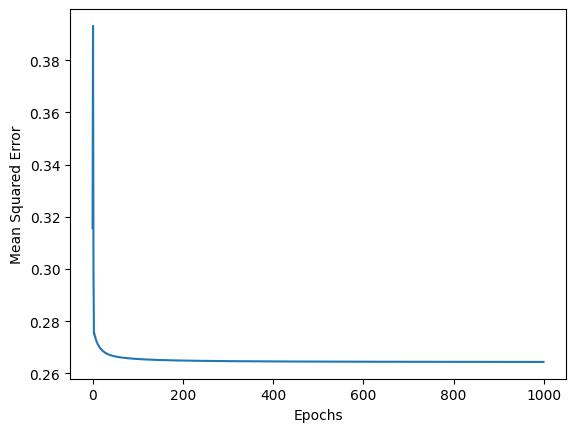

In [14]:
sigmoid_neuron = SigmoidNeuron()
sigmoid_neuron.fit(X_train, Y_train, epochs=1000, learning_rate=0.1, display_loss=True)

In [15]:
Y_pred_train = sigmoid_neuron.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

Y_pred_val = sigmoid_neuron.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training Accuracy: ", round(accuracy_train, 2))
print("Validation Accuracy: ", round(accuracy_val, 2))

Training Accuracy:  0.73
Validation Accuracy:  0.72


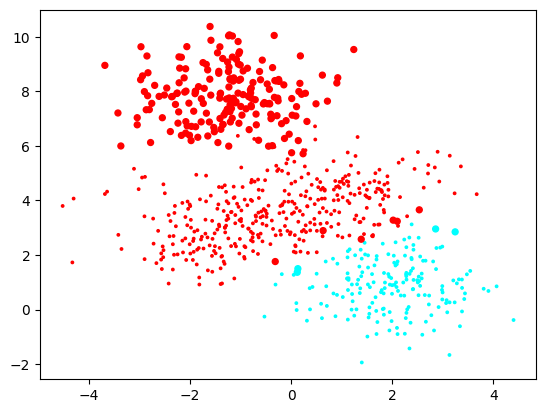

In [16]:
plt.scatter(X_train[:, 0],
            X_train[:, 1],
            c=Y_pred_binarised_train,
            cmap=my_cmap,
            s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

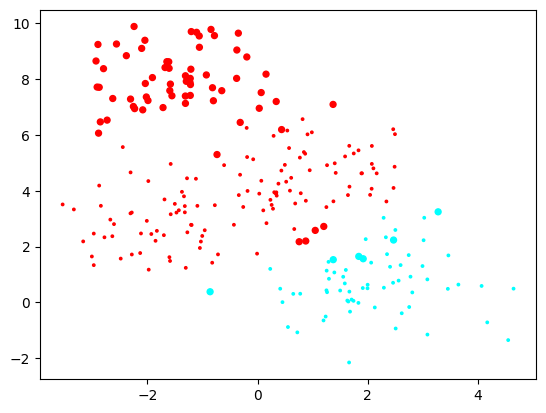

In [17]:
plt.scatter(X_val[:, 0],
            X_val[:, 1],
            c=Y_pred_binarised_val,
            cmap=my_cmap,
            s = 15*(np.abs(Y_pred_binarised_val-Y_val)+.2))

's' in `matplotlib.scatter()`: It is used to set the marker size of each point in the dataset. Bigger point indicate higher errors and smaller points indicate smaller error values.